In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df['job_posted_date'])

In [2]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

In [4]:
skill_stats

,median_salary,skill_count
job_skills,,
['excel'],70000.0,8095
['sql'],80000.0,4997
"['sql', 'excel']",90000.0,3020
['sap'],102075.0,1718
"['sql', 'python']",89100.0,1593
['power bi'],72500.0,1577
"['sql', 'tableau']",97500.0,1399
['go'],65000.0,1354
['tableau'],90000.0,1202


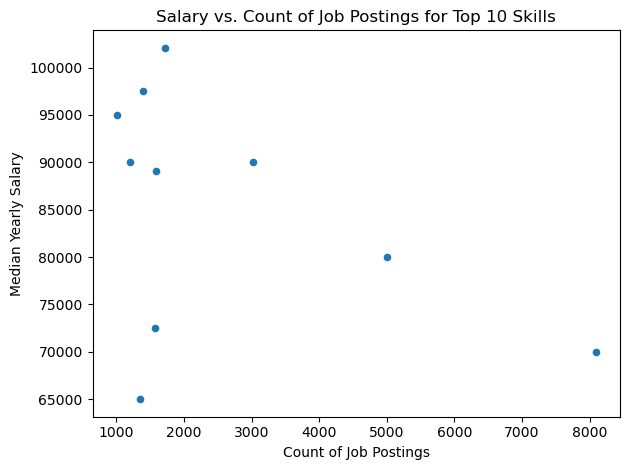

In [5]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

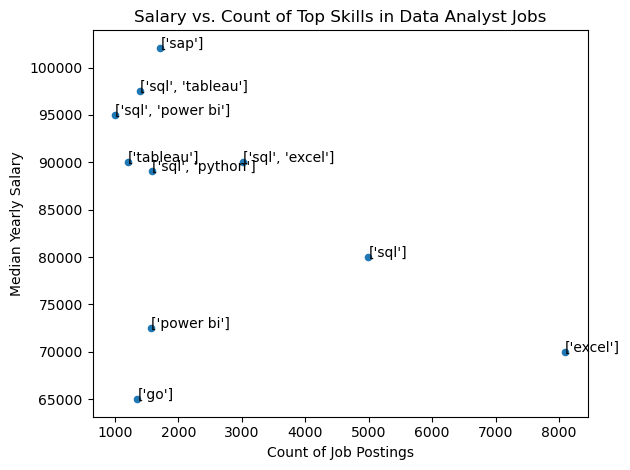

In [11]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')

plt.tight_layout()
plt.show()